# 📊 Exploratory Data Analysis (EDA)

This section explores the structure, quality, and patterns in the SECOM dataset, including missing values, distributions, and feature relationships.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the mood
sns.set(style="whitegrid")

# Load dataset
X = pd.read_csv("../data/secom_features.csv")
y = pd.read_csv("../data/secom_labels.csv", header=None, names=["label"])

# Combine features and labels into one DataFrame for convenience
df = X.copy()
df["label"] = y["label"]

## 🔍 Dataset Overview

Look at the size and structure of the dataset.


In [10]:
print("Shape of features:", X.shape)
print("Shape of labels:", y.shape)
df.head()

Shape of features: (1567, 590)
Shape of labels: (1568, 1)


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,-1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## 🧼 Missing Values

Missing values are common in manufacturing data. Let's identify which features have the most missing values.

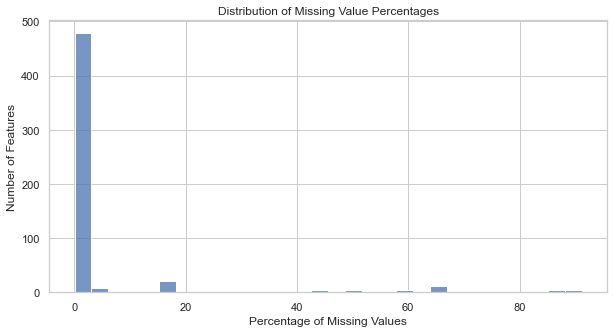

In [11]:
missing_counts = X.isnull().sum()
missing_pct = (missing_counts / len(X)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_pct
}).sort_values(by='Missing %', ascending=False)

missing_df[missing_df["Missing Count"] > 0].head(10)

#Plot the distribution of missing data
plt.figure(figsize=(10, 5))
sns.histplot(missing_pct[missing_pct > 0], bins=30, kde=False)
plt.title("Distribution of Missing Value Percentages")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Number of Features")
plt.show()

## 🏷️ Label Distribution

The label column indicates whether the product passed (1) or failed (-1) quality control. We'll inspect how balanced this target variable is.

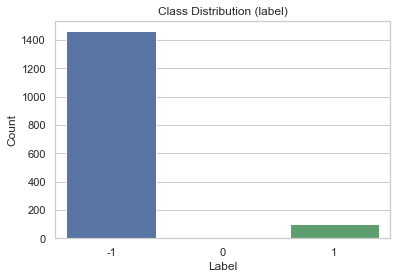

-1    0.932993
 1    0.066369
 0    0.000638
Name: label, dtype: float64


In [12]:
sns.countplot(x="label", data=df)
plt.title("Class Distribution (label)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

print(df["label"].value_counts(normalize=True))

## 📈 Feature Variance

We’ll identify any features that have no variability — i.e., the same value across all rows. These features carry no useful information for modeling.

In [13]:
# Calculate standard deviation for each column
feature_variances = X.std()

# Count how many have zero or near-zero variance
zero_var = (feature_variances == 0).sum()
print(f"Number of features with zero variance: {zero_var}")

# Display
low_var_features = feature_variances[feature_variances == 0]
low_var_features

Number of features with zero variance: 116


5      0.0
13     0.0
42     0.0
49     0.0
52     0.0
      ... 
534    0.0
535    0.0
536    0.0
537    0.0
538    0.0
Length: 116, dtype: float64

## 🔗 Feature Correlation

To understand redundancy in features, we examine correlations between a random subset of features.

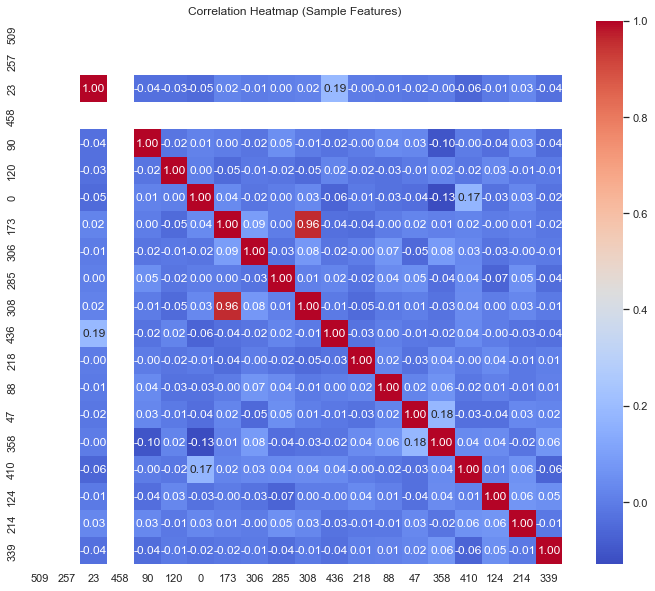

In [14]:
# Sample 20 random columns to plot correlations
sample_cols = X.sample(n=20, axis=1, random_state=1)
corr = sample_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Sample Features)")
plt.show()

## 🧭 Feature Distributions and Outliers

To better understand sensor behavior, we’ll visualize a few sensor columns. This helps us detect skewed distributions, outliers, and possible need for scaling or transformation.


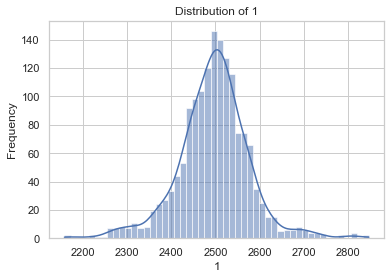

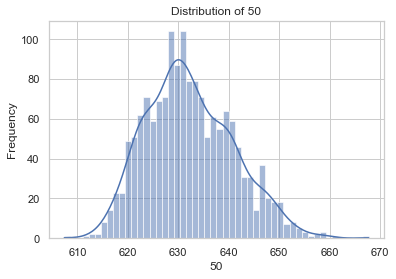

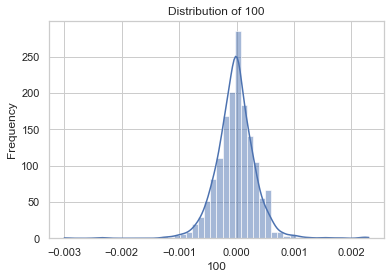

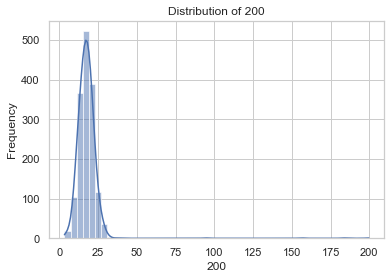

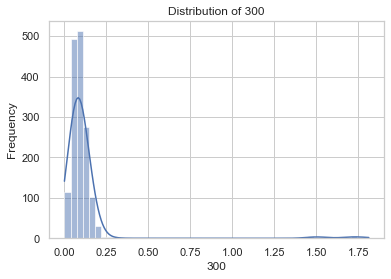

In [23]:
# Plot histograms for a few selected features

sample_cols = ["1", "50", "100", "200", "300",] 

for col in sample_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

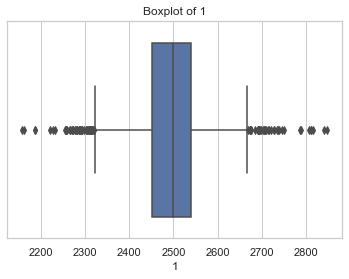

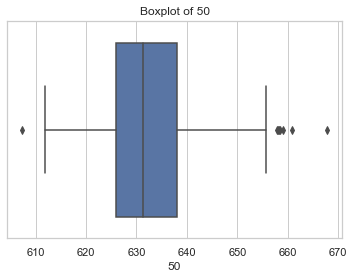

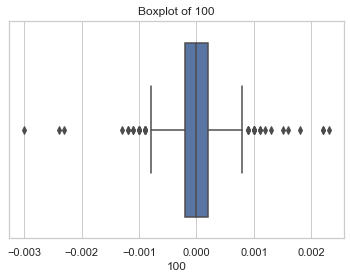

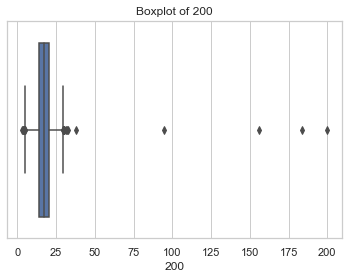

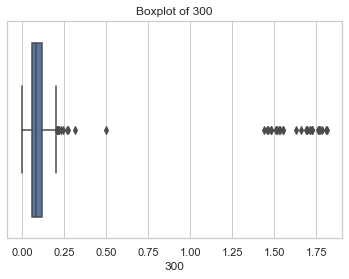

In [24]:
# Make boxplots for the same columns to show grouping and extreme outliers
for col in sample_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()
